<a href="https://colab.research.google.com/github/Nanangk/CNN_with_TensorFlow-Keras/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network With TenserFlow + Keras

Import Library yang dibutuhkan

In [2]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import TensorBoard

In [3]:
#Download datanya
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Mari kita cek Jumlah data dan sizenya

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

Terdapat 60.000 Gambar data training dan 1000 gambar data testing dengan size 28 x 28 piksel

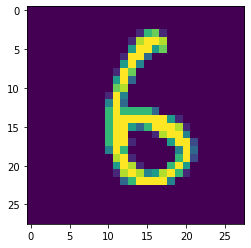

In [6]:
#coba cek gambarnya
plt.imshow(xtest[3000])

In [7]:
ytest[3000]

6

In [8]:
#cek ytrain masih berupa numerical
ytrain[3000]

9

In [9]:
xtrain = xtrain.reshape(60000, 28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [10]:
#konversi ytrain dan ytest dari numerical ke ctegorical
ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

Buat Model CNN nya

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='linear', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Liat Bentuk Modelnya

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                802880    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

Compile Modelnya

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [14]:
#Tensorboard utk melihat grafik proses training model nanti
callbacks = TensorBoard(log_dir='./Graph')

Waktunya Mentraining

In [16]:
model.fit(xtrain, ytrain, 
          batch_size=64, 
          epochs=10, 
          verbose=1,
          validation_data=(xtest, ytest),
          callbacks=[callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 390us/step - loss: 3.2009 - accuracy: 0.8837 - val_loss: 1.2678 - val_accuracy: 0.9201
Epoch 2/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.9062 - accuracy: 0.9305 - val_loss: 0.4089 - val_accuracy: 0.9593
Epoch 3/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.4177 - accuracy: 0.9408 - val_loss: 0.1941 - val_accuracy: 0.9602
Epoch 4/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.2204 - accuracy: 0.9495 - val_loss: 0.1600 - val_accuracy: 0.9560
Epoch 5/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.1534 - accuracy: 0.9573 - val_loss: 0.1040 - val_accuracy: 0.9693
Epoch 6/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.1282 - accuracy: 0.9627 - val_loss: 0.1115 - val_accuracy: 0.9696
Epoch 7/10
60000/60000 [==============================] 

Coba Predict

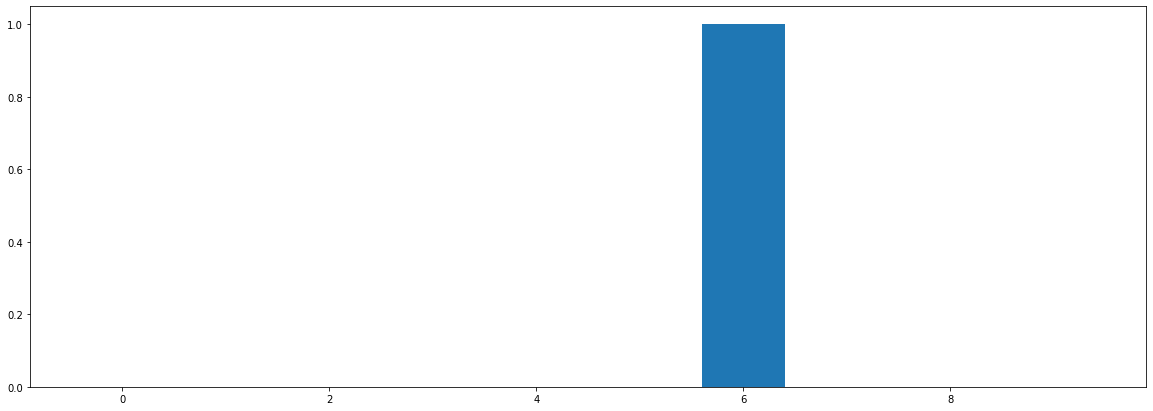

99.99915361404419% menunjukkan ini angka :6


In [28]:
datatest = xtest[650]
xd = model.predict(datatest.reshape(1,28,28,1))
xd=xd[0]
xs=np.arange(0,10,1)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(xs,xd)
plt.show()

a_max = xd.max()
mylist = xd
i=0
for i in range(len(mylist)):
  if mylist[i] == a_max:
    print(str(a_max * 100)+ '% menunjukkan ini angka :' +str(i))
  i+=1
   

In [25]:
#mau nyari posisi angka di data test
def cari(x):
  i=0
  for i in range(len(ytest)):
    if x == np.argmax(ytest[i], axis=-1) :
      print("ada di index "+str(i))
      break  

cari(8)

ada di index 61
